In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# load data form input
submission_example = pd.read_csv("../input/covid19-global-forecasting-week-4/submission.csv")
test = pd.read_csv("../input/covid19-global-forecasting-week-4/test.csv")
train = pd.read_csv("../input/covid19-global-forecasting-week-4/train.csv")
display(train.head(5))
display(train.describe())
print("Number of Country_Region: ", train['Country_Region'].nunique())
print("Dates go from day", min(train['Date']), "to day", max(train['Date']), ", a total of", train['Date'].nunique(), "days")
print("Countries with Province/State informed: ")
print( train.loc[train['Province_State']!='None']['Country_Region'].unique())

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


,Id,ConfirmedCases,Fatalities
count,24727.000000,24727.000000,24727.000000
mean,17824.000000,889.193351,43.134792
std,10300.687114,6874.378113,526.129270
min,1.000000,0.000000,0.000000
25%,8912.500000,0.000000,0.000000
50%,17824.000000,0.000000,0.000000
75%,26735.500000,77.000000,1.000000
max,35647.000000,161779.000000,18279.000000


Number of Country_Region:  184
Dates go from day 2020-01-22 to day 2020-04-09 , a total of 79 days
Countries with Province/State informed: 
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Hai

In [3]:
# preprocessing
train.Province_State.fillna("None", inplace=True)
test.Province_State.fillna("None", inplace=True)
train['Date'] = train['Date'].map(lambda x:x[5:])
test['Date'] = test['Date'].map(lambda x:x[5:])
# train.to_csv('train.csv',index = False)
# test.to_csv('test.csv',index = False)

In [4]:
confirmed_total_date_China = train[train['Country_Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_China = train[train['Country_Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})


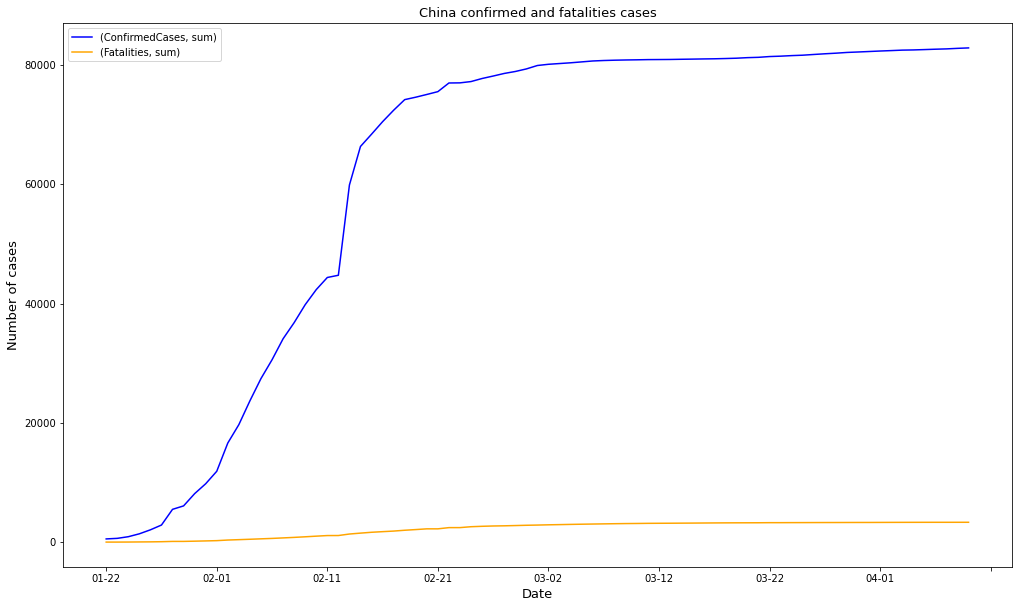

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(17,10))
confirmed_total_date_China.plot(ax=ax1,color='blue')
fatalities_total_date_China.plot(ax=ax1,color='orange')
ax1.set_title("China confirmed and fatalities cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
plt.legend()
plt.savefig("../graphs/China confirmed and fatalities cases")